### Implementation of K-means method. It returns a dict containing cluster points & labels, an array containg cluster mean vectors, an array of error function value at each iteration

In [ ]:
import pandas as pd
import numpy as np
import random

def kmeans(input_array, k, init_clusters):

  n_samples = input_array.shape[0]
  n_features = input_array.shape[1]
  
  mean_vectors = np.zeros((k,n_features))
  error_function_val = []

  clusters = {} #clusters dict
  for i in range(k):
    clusters[str(i)] = init_clusters[str(i)].copy()

  clusters['labels'] = np.full(n_samples, -1)

  iterations = 300
  while True:

    cur_error_func_val = 0;

    mean_vectors_old = mean_vectors.copy()
    for c in range(k):
      cluster_points = np.array(clusters[str(c)])
      mean = np.mean(cluster_points, axis=0)
      mean_vectors[c] = mean

      for i in range(len(cluster_points)):
        cur_error_func_val += np.sum((cluster_points[i] - mean) ** 2, axis=0)

    error_function_val.append(cur_error_func_val)

    if np.all(mean_vectors_old == mean_vectors):
      break
    
    #clear the points in clusters & corresponding labels
    for j in range(k):
      clusters[str(j)] = [] 

    clusters['labels'] = np.full(n_samples, -1)

    for i in range(len(input_array)):
      distance = []
      for l in range(k):
        distance_l = np.sum((input_array[i] - mean_vectors[l]) ** 2, axis=0)
        distance.append(distance_l)

      new_cluster_index = np.argmin(distance)
      clusters[str(new_cluster_index)].append(input_array[i])
      clusters['labels'][i] = new_cluster_index + 1

    iterations -= 1
      
  return clusters, mean_vectors, error_function_val

### Clustering using the above K-means method with K=4 and using 5 different random initialization

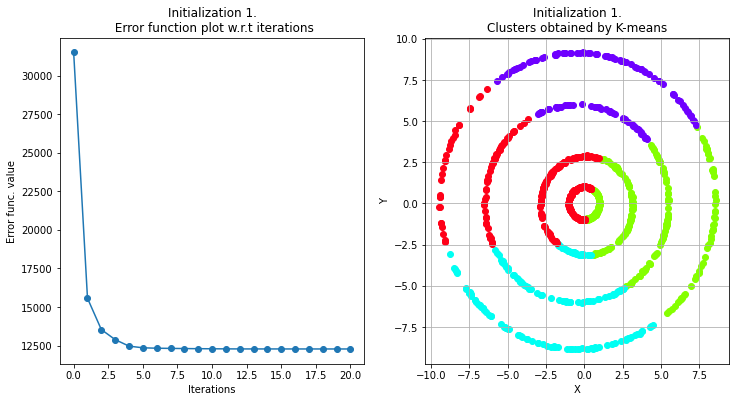

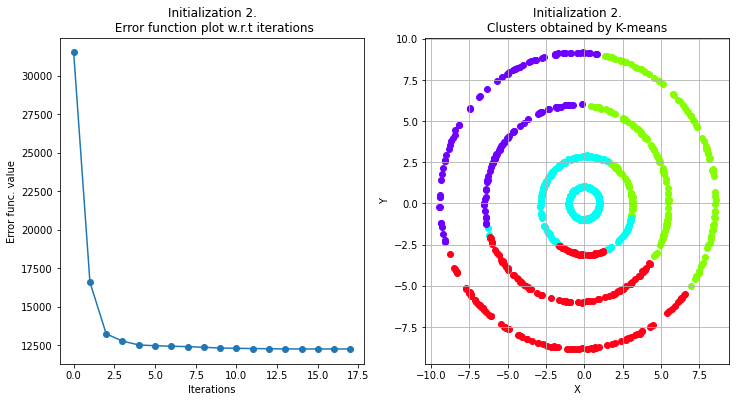

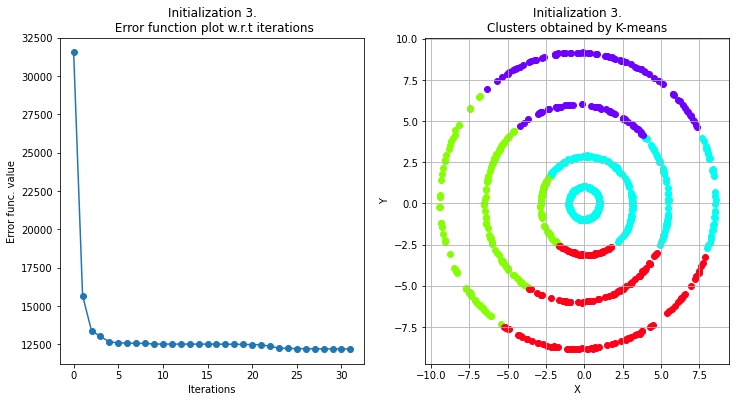

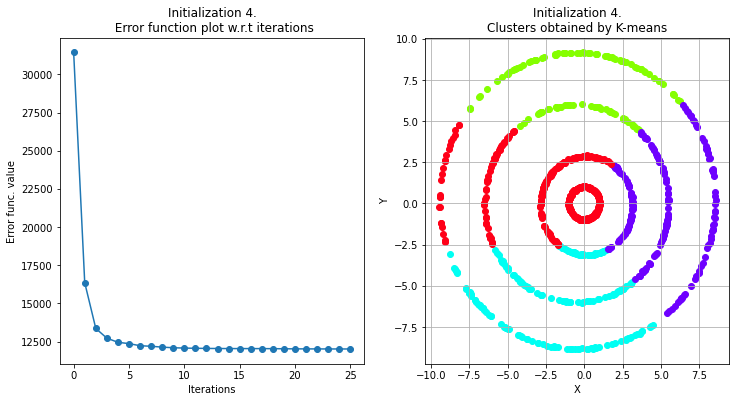

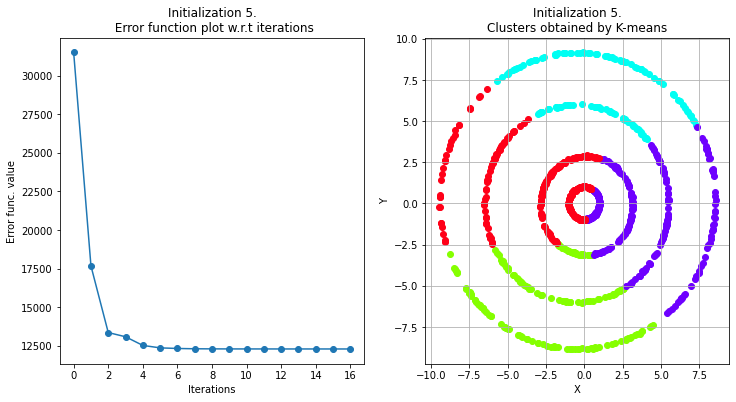

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d 

df = pd.read_csv("/content/Dataset.csv", names=['x', 'y'])

input_data_set = df.iloc[:, :].values

num_clusters = 4;
num_data_points = input_data_set.shape[0]

for loop in range(5):
  initial_clusters = {} #initial clusters dict
  for i in range(num_clusters):
    initial_clusters[str(i)] = []

  for i in range(num_data_points):
    cluster_index = np.random.randint(num_clusters)
    initial_clusters[str(cluster_index)].append(input_data_set[i])

  cluster_dicts, means, iteration_erros = kmeans(input_data_set, num_clusters, initial_clusters)

  cmp = plt.cm.get_cmap('hsv', num_clusters + 1)
  fig, (error_ax, cluster_ax) = plt.subplots(ncols=2, figsize=(12,6))

  error_ax.set_xlabel("Iterations")
  error_ax.set_ylabel("Error func. value")
  error_ax.set_title("Initialization " + str(loop +1)+ ".\n Error function plot w.r.t iterations")
  error_ax.plot(np.arange(len(iteration_erros)), iteration_erros, 'o-')

  cluster_ax.set_title("Initialization " + str(loop +1)+ ".\nClusters obtained by K-means")
  cluster_ax.set_xlabel("X")
  cluster_ax.set_ylabel("Y")
  for i in range(num_clusters):
    cluster_points = np.array(cluster_dicts[str(i)])
    cluster_ax.scatter(cluster_points[:,0], cluster_points[:,1], c=[cmp(i + 1)])

    #cluster_center = means[i]
    #cluster_ax.scatter(cluster_center[0],cluster_center[1],color="black",marker="X", s=100)

  plt.grid()
  plt.show()